In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import math
from common import NWSL, Fonts, Colors, Images, add_signature, add_source, Data, Playoffs

In [7]:
year = "2025"
matches = pd.read_csv("data/" + year + ".csv")
matches["season"] = year
standings = Data.get_nwsl_standings(matches)
teams = list(standings["team"])
standings

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points
1,KC,20,2,3,47.0,12.0,35.0,62
2,WAS,12,8,5,42.0,32.0,10.0,44
3,ORL,11,6,8,32.0,26.0,6.0,39
4,RGN,10,8,7,31.0,28.0,3.0,38
5,SD,10,7,8,40.0,32.0,8.0,37
6,POR,10,7,8,34.0,29.0,5.0,37
7,NJY,9,9,7,33.0,22.0,11.0,36
8,LOU,9,7,9,34.0,38.0,-4.0,34
9,NC,8,8,9,34.0,37.0,-3.0,32
10,HOU,8,6,11,27.0,37.0,-10.0,30


In [8]:
g = Playoffs.calc_games_matrix(matches, teams)
p0 = Playoffs.calc_initial_points(matches, teams)

df = pd.DataFrame([])
df["team"] = teams
df["highest"] = df["team"].apply(
    lambda team: Playoffs.calculate_highest_finish(team, teams, g, p0)
)
df["lowest"] = df["team"].apply(
    lambda team: Playoffs.calculate_lowest_finish(team, teams, g, p0)
)

df

,team,highest,lowest
0,KC,1,1
1,WAS,2,2
2,ORL,3,7
3,RGN,3,7
4,SD,3,8
5,POR,3,8
6,NJY,4,8
7,LOU,5,9
8,NC,8,10
9,HOU,9,11


<Figure size 4800x3200 with 0 Axes>

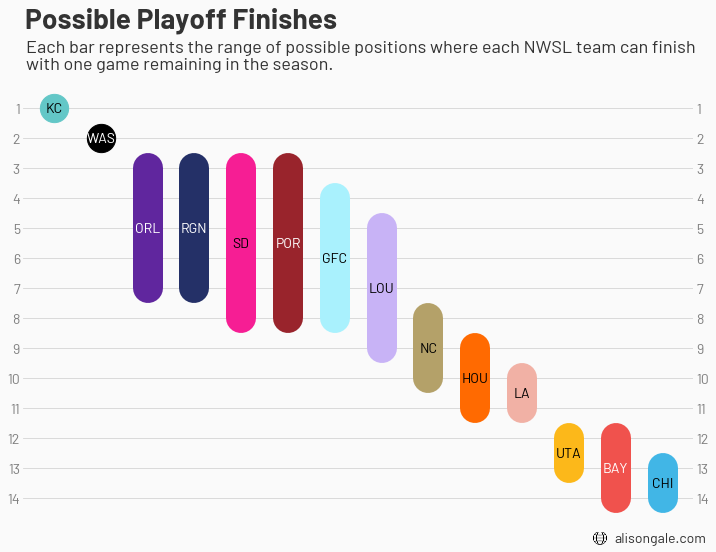

In [9]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
ax.set_facecolor(Colors.WHITE)
fig.patch.set_facecolor(Colors.WHITE)

team_map = {
    "BFC": "BAY",
    "NJY": "GFC",
    "KC": "KCC",
}
for i, row in df.iterrows():
    label = team_map[row["team"]] if row["team"] in team_map else row["team"]
    color = NWSL.color(label)
    if row["highest"] == row["lowest"]:
        ax.scatter(i, row["highest"], s=800, c=color)
    else:
        ax.plot(
            [i, i],
            [row["highest"], row["lowest"]],
            lw=30,
            solid_capstyle="round",
            c=color,
        )

    ax.text(
        i,
        (row["lowest"] + row["highest"])/2,
        label.replace("KCC", "KC"),
        ha="center",
        va="center",
        fontproperties=Fonts.BARLOW,
        size=14,
        color=NWSL.text_color(label),
    )


# Axes
ax.spines[["top", "bottom", "right", "left"]].set_visible(False)
ax.set_yticks(range(1, 15))
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.set_ylim([14.5, 0])
ax.set_xticks([])
ax.tick_params(axis="both", which="both", length=0)
ax.tick_params(labelright=True)
for label in ax.get_yticklabels() + ax.get_xticklabels():
    fp = Fonts.BARLOW
    fp.set_size(14)
    label.set_fontproperties(fp)
    label.set_color(Colors.GRAY)
    
# Title
ax.text(
    -0.62,
    -1.7,
    "Possible Playoff Finishes",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Subtitle
ax.text(
    -0.6,
    -0.3,
    "Each bar represents the range of possible positions where each NWSL team can finish\nwith one game remaining in the season.",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

add_signature(fig, x=0.78, y=0.07, fs=14, w=0.023)

# Save image
plt.savefig(
    "images/possible_finishes_"+ year +"_1weeksleft.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)